In [1]:
%pip install spacy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install regex

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
try:
    import importlib
    from utils import load_all_bills
except Exception as e:
    print(e)

In [4]:
bills = load_all_bills()

In [5]:
from spacy.tokenizer import Tokenizer
from spacy.lang.pl import Polish

In [6]:
import regex as re

In [7]:
nlp = Polish()
tokenizer = nlp.tokenizer

In [8]:
bills_processed = dict()

for bill_name, bill_text in bills.items():
    # bills_processed[bill_name] = tokenizer(bill_text)
    bill_text = re.sub(r'\s+', ' ', bill_text)
    doc = tokenizer(bill_text)
    bills_processed[bill_name] = [token.text for token in doc]
    

In [9]:
from collections import Counter

In [10]:
frequency_lists_local = dict()

for bill_name, bill_text in bills_processed.items():
    frequency_lists_local[bill_name] = Counter(bill_text)

In [11]:
frequency_lists_local['1993_599.txt']

Counter({' ': 1,
         'Dz': 4,
         '.': 497,
         'U': 4,
         'z': 106,
         '1993': 9,
         'r': 20,
         'Nr': 11,
         '129': 2,
         ',': 306,
         'poz': 17,
         '599': 2,
         'USTAWA': 1,
         'dnia': 12,
         '9': 9,
         'grudnia': 9,
         'o': 41,
         'zmianie': 1,
         'ustawy': 10,
         'podatku': 42,
         'od': 28,
         'towarów': 49,
         'i': 150,
         'usług': 29,
         'oraz': 30,
         'akcyzowym': 4,
         'Art': 8,
         '1': 94,
         'W': 12,
         'ustawie': 1,
         '8': 10,
         'stycznia': 2,
         '(': 48,
         '11': 13,
         '50': 3,
         '28': 3,
         '127': 1,
         ')': 179,
         'wprowadza': 1,
         'się': 66,
         'następujące': 1,
         'zmiany': 1,
         ':': 70,
         'w': 215,
         'art': 67,
         '3': 51,
         'a': 35,
         'dotychczasowa': 1,
         'treść': 1,
       

In [12]:
frequency_list_global = Counter()

for freq_l in frequency_lists_local.values():
    frequency_list_global+=freq_l

In [13]:
filtered_flg = Counter()

regex = re.compile('\p{L}*')

for entry, score in frequency_list_global.items():
    if len(entry)>2 and regex.fullmatch(entry):
        filtered_flg[entry] = score

In [14]:
filtered_flg

Counter({'Tekst': 225,
         'ustawy': 13067,
         'przyjęty': 217,
         'przez': 20731,
         'Senat': 144,
         'bez': 2374,
         'poprawek': 214,
         'USTAWA': 999,
         'dnia': 17937,
         'lipca': 1339,
         'zmianie': 1518,
         'dokumentach': 131,
         'paszportowych': 39,
         'Art': 30838,
         'ustawie': 5473,
         'poz': 45203,
         'wprowadza': 1988,
         'się': 45882,
         'następujące': 2276,
         'zmiany': 2830,
         'art': 52961,
         'ust': 53631,
         'dodaje': 8423,
         'brzmieniu': 7295,
         'wydawanych': 161,
         'osobom': 711,
         'które': 4103,
         'nie': 22345,
         'ukończyły': 34,
         'lat': 3112,
         'zamieszcza': 185,
         'obrazu': 55,
         'linii': 228,
         'papilarnych': 12,
         'pkt': 19124,
         'kropkę': 770,
         'zastępuje': 4818,
         'średnikiem': 175,
         'których': 17928,
         'pobran

In [15]:
rank_sorted = list(filtered_flg.values())
rank_sorted.sort(reverse=True)

In [16]:
rank_sorted

[53631,
 52961,
 45882,
 45800,
 45203,
 33552,
 30838,
 28780,
 22345,
 20731,
 19124,
 17937,
 17928,
 13193,
 13067,
 12076,
 11787,
 10576,
 9835,
 9034,
 8708,
 8423,
 8196,
 7802,
 7727,
 7476,
 7295,
 7179,
 6957,
 6849,
 6674,
 6494,
 6451,
 6366,
 6320,
 6202,
 6119,
 6098,
 5936,
 5816,
 5473,
 5445,
 5313,
 5048,
 5043,
 4990,
 4825,
 4818,
 4812,
 4807,
 4694,
 4590,
 4493,
 4465,
 4446,
 4393,
 4242,
 4205,
 4198,
 4131,
 4103,
 4023,
 4016,
 3966,
 3916,
 3835,
 3782,
 3758,
 3726,
 3702,
 3600,
 3595,
 3548,
 3466,
 3457,
 3376,
 3361,
 3352,
 3348,
 3317,
 3311,
 3295,
 3223,
 3158,
 3150,
 3146,
 3112,
 3082,
 3075,
 3024,
 2949,
 2937,
 2910,
 2869,
 2867,
 2853,
 2846,
 2830,
 2801,
 2790,
 2781,
 2753,
 2736,
 2701,
 2673,
 2638,
 2601,
 2591,
 2586,
 2563,
 2553,
 2536,
 2529,
 2519,
 2490,
 2488,
 2485,
 2453,
 2444,
 2440,
 2439,
 2428,
 2416,
 2410,
 2401,
 2376,
 2374,
 2335,
 2307,
 2300,
 2298,
 2282,
 2276,
 2268,
 2253,
 2250,
 2194,
 2146,
 2127,
 2126,
 2

In [17]:
x = list(range(len(rank_sorted)))



In [18]:
import matplotlib.pyplot as plt


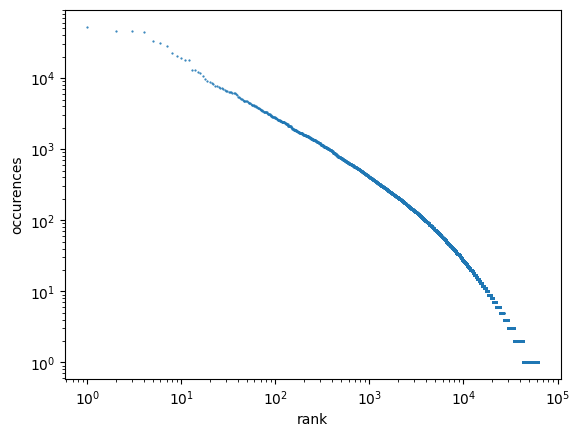

In [19]:
plt.yscale('log')
plt.xscale('log')
plt.ylabel("occurences")
plt.xlabel("rank")
plt.scatter(x,rank_sorted, s=0.3)

In [20]:
import morfeusz2

In [21]:
morf = morfeusz2.Morfeusz()

In [22]:
def check_in_dict(morf, word):
    analysis = morf.analyse(word)
    return analysis[0][2][2]!="ign"

In [23]:
def find_words_not_in_dictionary(morf, words, limit=30):
    words_not_in_dictionary = []
    
    for word in words:
        if not check_in_dict(morf, word):
            words_not_in_dictionary.append(word)
            if len(words_not_in_dictionary)==limit:
                break

    return words_not_in_dictionary

In [24]:
find_words_not_in_dictionary(morf, ["Dzień", "Dobry", "dajwoifdaiownf"])

['dajwoifdaiownf']

In [25]:
words = list(filtered_flg.keys())

words_sorted = sorted(words, key=lambda x: filtered_flg[x], reverse=True)



In [26]:
import random
from copy import copy

random.seed(0)

words_shuffled=copy(words)

random.shuffle(words_shuffled)

In [27]:
words_shuffled

['niewidomy',
 'brodem',
 'grach',
 'popiele',
 'świadczyła',
 'Pokryciowych',
 'radcach',
 'nieuniknionej',
 'unieruchomienia',
 'budowle',
 'przeterminowanych',
 'natężenia',
 'ustaworaz',
 'monitorującego',
 'zatrzymania',
 'elektrod',
 'wydzierżawiający',
 'budowlaną',
 'REKREACYJNYCH',
 'zanieczyszczeniach',
 'Sztabie',
 'Miesięczną',
 'farmaceutyczną',
 'kancelariach',
 'pożarom',
 'przyuczenia',
 'zezwolenie',
 'siedziba',
 'pozostają',
 'zawdzięczają',
 'przewozowym',
 'malejących',
 'Oświęcim',
 'przemówień',
 'asenizacyjne',
 'najdłużej',
 'ilaste',
 'przekierowane',
 'półkami',
 'aglomeracja',
 'pogodowych',
 'protesty',
 'podświetlane',
 'najsurowszej',
 'Opiekę',
 'DIECEZJE',
 'obowiązkowych',
 'frotte',
 'Wspólnotowego',
 'tarnobrzeski',
 'odrzutowym',
 'rozkłada',
 'Skierowaniu',
 'zadysponuje',
 'zorganizowanej',
 'rodzicom',
 'zagranicznym',
 'odnotowanie',
 'Odzieży',
 'grona',
 'przedmiotowego',
 'branżową',
 'ubezpieczająca',
 'niezałatwionych',
 'dietyloamid',
 'os

In [28]:
not_in_dictionary_top = find_words_not_in_dictionary(morf, words_sorted)
not_in_dictionary_top

['poz',
 'późn',
 'str',
 'GMO',
 'SWW',
 'operacyjno',
 'SKW',
 'IKE',
 'rolno',
 'techniczno',
 'remediacji',
 'rozdz',
 'URE',
 'UKE',
 'itp',
 'charytatywno',
 'sanitarno',
 'PKWiU',
 'UDT',
 'społeczno',
 'BSWSG',
 'BSWP',
 'Społeczno',
 'organizacyjno',
 'Biobójczych',
 'PHS',
 'komandytowo',
 'wodociągowo',
 'architektoniczno',
 'HCFC']

In [29]:
not_in_dictionary_rand = find_words_not_in_dictionary(morf, words_shuffled)
not_in_dictionary_rand

['ustaworaz',
 'dietyloamid',
 'EUTC',
 'PHP',
 'Sust',
 'etanotetrahydrooripawina',
 'przelicze',
 'języko',
 'fenetylo',
 'Elim',
 'Metkatynon',
 'Papaver',
 'Kyrgyskiej',
 'trifenyle',
 'Odmia',
 'cidr',
 'METYLODIHYDROMOR',
 'wódzki',
 'PCT',
 'nicznych',
 'kowskich',
 'PPHU',
 'niehalogenowanych',
 'rekapitalizacji',
 'osobopoznawcze',
 'najle',
 'upra',
 'beschrankter',
 'rozpuszczalnośk',
 'próbobiorców']

In [30]:
WORDS = Counter({entry: count for entry, count in filtered_flg.items() if check_in_dict(morf, entry) })

In [98]:
def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or ["NOT_IN_DICTIONARY"])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'aąbcdeęfghijklłmnńoópqrstuvwxyzżź'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [101]:
corrections_top = []
for word in not_in_dictionary_top:
    corr = correction(word)
    print(word, corr)
    corrections_top.append(corr)

poz pod
późn plan
str stu
GMO Gdy
SWW Sąd
operacyjno operacyjne
SKW Sąd
IKE Izb
rolno rolne
techniczno techniczne
remediacji mediacji
rozdz rozkaz
URE Urz
UKE Urz
itp ity
charytatywno charytatywną
sanitarno sanitarny
PKWiU NOT_IN_DICTIONARY
UDT Urz
społeczno społeczne
BSWSG NOT_IN_DICTIONARY
BSWP NOT_IN_DICTIONARY
Społeczno Społeczna
organizacyjno organizacyjne
Biobójczych NOT_IN_DICTIONARY
PHS Pan
komandytowo komandytowa
wodociągowo wodociągowe
architektoniczno architektoniczne
HCFC CFC


In [100]:
rand_corrections = []
for word in not_in_dictionary_rand:
    corr = correction(word)
    print(word, corr)
    rand_corrections.append(corr)

ustaworaz ustawowa
dietyloamid NOT_IN_DICTIONARY
EUTC ECU
PHP Pan
Sust ust
etanotetrahydrooripawina NOT_IN_DICTIONARY
przelicze przelicza
języko języku
fenetylo NOT_IN_DICTIONARY
Elim lit
Metkatynon NOT_IN_DICTIONARY
Papaver Pasażer
Kyrgyskiej Kirgiskiej
trifenyle difenyle
Odmia Odmian
cidr cydr
METYLODIHYDROMOR NOT_IN_DICTIONARY
wódzki wózki
PCT Pan
nicznych licznych
kowskich morskich
PPHU NOT_IN_DICTIONARY
niehalogenowanych NOT_IN_DICTIONARY
rekapitalizacji kapitalizacji
osobopoznawcze NOT_IN_DICTIONARY
najle najmu
upra upraw
beschrankter NOT_IN_DICTIONARY
rozpuszczalnośk rozpuszczalności
próbobiorców NOT_IN_DICTIONARY


In [34]:
from elasticsearch import Elasticsearch

In [60]:
client = Elasticsearch("http://localhost:9200")

In [43]:
mapping = {
    "properties": {
      "word": { 
        "type": "text",
      }

    }
}

In [44]:
my_index = "dictionary"

In [65]:
client.indices.delete(index=my_index, ignore=[400, 404])

{'acknowledged': True}

In [66]:
client.indices.create(index=my_index, mappings=mapping)

{'acknowledged': True, 'shards_acknowledged': True, 'index': 'dictionary'}

In [67]:
words = []
with open('sgjp-20221030.tab', 'r') as file:
    i=0
    for line in file.readlines():
        line_split = line.split()
        words.append(line_split[0])

words

['AA',
 'AA',
 'AA',
 'AAP',
 'ABB',
 'ABB',
 'ABB-ach',
 'ABB-ami',
 'ABB-ie',
 'ABB-o',
 'ABB-om',
 'ABB-y',
 'ABB-y',
 'ABB-ą',
 'ABB-ę',
 'ABBA',
 'ABC',
 'ABS',
 'ABS-ach',
 'ABS-ami',
 'ABS-em',
 'ABS-ie',
 'ABS-ie',
 'ABS-om',
 'ABS-owi',
 'ABS-u',
 'ABS-y',
 'ABS-ów',
 'AC',
 'ACTA',
 'ADM',
 'ADM',
 'ADM-ach',
 'ADM-ami',
 'ADM-em',
 'ADM-ie',
 'ADM-ie',
 'ADM-om',
 'ADM-owi',
 'ADM-u',
 'ADM-y',
 'ADM-ów',
 'ADN',
 'ADN',
 'ADN-ach',
 'ADN-ami',
 'ADN-em',
 'ADN-ie',
 'ADN-ie',
 'ADN-om',
 'ADN-owi',
 'ADN-u',
 'ADN-y',
 'ADN-ów',
 'ADP',
 'ADP',
 'AF',
 'AF',
 'AF-ach',
 'AF-ami',
 'AF-em',
 'AF-ie',
 'AF-ie',
 'AF-om',
 'AF-owi',
 'AF-u',
 'AF-y',
 'AF-ów',
 'AFP',
 'AFP',
 'AGD',
 'AGH',
 'AGH',
 'AI',
 'AI',
 'AI',
 'AIDS',
 'AIDS',
 'AIDS',
 'AIDS',
 'AIDS-a',
 'AIDS-ach',
 'AIDS-ach',
 'AIDS-ami',
 'AIDS-ami',
 'AIDS-em',
 'AIDS-em',
 'AIDS-ie',
 'AIDS-ie',
 'AIDS-ie',
 'AIDS-ie',
 'AIDS-om',
 'AIDS-om',
 'AIDS-owi',
 'AIDS-owi',
 'AIDS-u',
 'AIDS-y',
 'AIDS-y',
 'AIDS-

In [56]:
actions = [
    {
        "_index": my_index,
        "_source": {
            "word": word
        }
    }
    for word in words
]

In [68]:
from elasticsearch import helpers

helpers.bulk(client, actions)

(7412267, [])

In [69]:
client.count(index=my_index)

{'count': 7412267,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}}

In [70]:
len(words)

7412267

In [92]:
def correction_es(word):
    query = {
        "fuzzy": {
            "word": word
        }
    }
    search_result = client.search(index=my_index, query=query, track_total_hits=True)
    if search_result['hits']['total']['value']>0:
        return search_result['hits']['hits'][0]["_source"]["word"]
    return "NOT_IN_DICTIONARY"


In [102]:
corrections_es_top = []
for word in not_in_dictionary_top:
    corr = correction_es(word)
    print(word, corr)
    corrections_es_top.append(corr)


poz poz
późn Późna
str str
GMO NOT_IN_DICTIONARY
SWW NOT_IN_DICTIONARY
operacyjno operacyjno
SKW NOT_IN_DICTIONARY
IKE NOT_IN_DICTIONARY
rolno rolno
techniczno techniczno
remediacji repudiacji
rozdz rozdz
URE NOT_IN_DICTIONARY
UKE NOT_IN_DICTIONARY
itp itp
charytatywno charytatywno
sanitarno sanitarno
PKWiU NOT_IN_DICTIONARY
UDT NOT_IN_DICTIONARY
społeczno społeczno
BSWSG NOT_IN_DICTIONARY
BSWP NOT_IN_DICTIONARY
Społeczno społeczno
organizacyjno organizacyjno
Biobójczych NOT_IN_DICTIONARY
PHS NOT_IN_DICTIONARY
komandytowo komandytowo
wodociągowo wodociągowo
architektoniczno architektoniczno
HCFC NOT_IN_DICTIONARY


/home/wojtek/.local/lib/python3.10/site-packages/elasticsearch/connection/base.py:200: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  warnings.warn(message, category=ElasticsearchWarning)


In [ ]:
corrections_es_rand = []
for word in not_in_dictionary_rand:
    corr = correction_es(word)
    print(word, corr)
    corrections_es_top.append(corr)
